In [2]:
import tensorflow as tf
import numpy as np
import keras

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
#loading the dataset using tensorflow.keras.datasets.fashion_mnist.load_data()

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

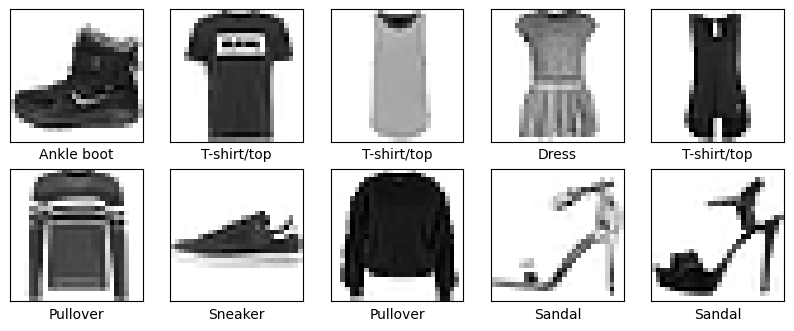

In [4]:
#display 10 images from the dataset and labels

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

In [5]:
#check if the data needs normalization

print("Max pixel value in x_train: ", x_train.max())
print("Min pixel value in x_train: ", x_train.min())

Max pixel value in x_train:  255
Min pixel value in x_train:  0


Veriyi normalize etmek, veri değerlerini belirli bir aralığa sıkıştırarak işlem yapmayı kolaylaştırır. Normalizasyon, veri değerlerini genellikle 0 ile 1 arasında veya -1 ile 1 arasında bir aralığa dönüştürmek için kullanılır.

Veriyi normalize etmek önemlidir çünkü:

1. **Daha iyi performans**: Bazı makine öğrenimi algoritmaları, verinin belirli bir aralıkta olmasını gerektirir. Örneğin, sinir ağları genellikle girdi verilerini normalize edilmiş şekilde işler. Normalizasyon, algoritmanın daha hızlı ve daha iyi sonuçlar üretmesine yardımcı olabilir.

2. **Ölçeklenebilirlik**: Veri normalizasyonu, farklı özelliklere sahip veri noktalarını karşılaştırılabilir hale getirir. Örneğin, bir özellik diğerinden çok daha büyük değerler alıyorsa, normalizasyon yapmadan bu özellik diğerlerini domine edebilir. Normalizasyon, veri noktalarının birbirleriyle karşılaştırılabilir olmasını sağlar.

3. **Aşırı öğrenmeyi önleme**: Veri normalizasyonu, aşırı öğrenmeyi önlemeye yardımcı olabilir. Aşırı öğrenme, modelin eğitim verilerine çok fazla uyum sağlaması ve genelleme yapamaması durumudur. Normalizasyon, veri değerlerini sıkıştırarak aşırı öğrenmeyi azaltabilir.

Veriyi normalize etmek için farklı yöntemler kullanılabilir, örneğin Min-Max normalizasyonu veya Z-skor normalizasyonu gibi. Hangi yöntemin kullanılacağı, verinin özelliklerine ve kullanılan algoritmalara bağlıdır.

Özetlemek gerekirse, veriyi normalize etmek, veri işleme ve makine öğrenimi algoritmalarının daha iyi performans göstermesine yardımcı olur, veri noktalarını karşılaştırılabilir hale getirir ve aşırı öğrenmeyi önleyebilir.

In [6]:
#normalize the data

x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
#print the normalized data

print("Max pixel value in x_train: ", x_train.max())
print("Min pixel value in x_train: ", x_train.min())


Max pixel value in x_train:  1.0
Min pixel value in x_train:  0.0


In [8]:
#check if labels are categorical

print("y_train shape: ", y_train.shape)
print("y_train sample: ", y_train[:10])
print("-----")

#convert the labels to categorical

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print("-----")


print("y_train shape: ", y_train.shape)
print("y_train sample: ", y_train[:10])
print("-----")


y_train shape:  (60000,)
y_train sample:  [9 0 0 3 0 2 7 2 5 5]
-----
-----
y_train shape:  (60000, 10)
y_train sample:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
-----


In [9]:
# build cnn model using keras Sequential API with the following layers and parameters
# 1. Conv2D with 32 filters, kernel size 3x3, activation function relu, input shape 28x28x1
# 2. MaxPooling2D with pool size 2x2
# 3. Conv2D with 64 filters, kernel size 3x3, activation function relu
# 4. MaxPooling2D with pool size 2x2
# 5. Flatten
# 6. Dense with 128 units and activation function relu
# 7. Dense with 10 units and activation function softmax

model = Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [10]:
#compile the model with the following parameters
# 1. optimizer adam
# 2. loss function categorical_crossentropy
# 3. metrics accuracy

model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [11]:
#reshape the data to 4D tensor

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [13]:
#shape of x_train and y_train
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)


x_train shape:  (60000, 28, 28, 1)
y_train shape:  (60000, 10)


In [ ]:
#fit the model with the training data
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4422 - accuracy: 0.8394 - val_loss: 0.3414 - val_accuracy: 0.8784
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2981 - accuracy: 0.8908 - val_loss: 0.3243 - val_accuracy: 0.8840
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2502 - accuracy: 0.9074 - val_loss: 0.2663 - val_accuracy: 0.9049
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2179 - accuracy: 0.9185 - val_loss: 0.2657 - val_accuracy: 0.9029
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1893 - accuracy: 0.9284 - val_loss: 0.2574 - val_accuracy: 0.9074
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1652 - accuracy: 0.9380 - val_loss: 0.2625 - val_accuracy: 0.9056
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1456 - accuracy: 0.9442 - val_loss: 0.2658 - val_accu

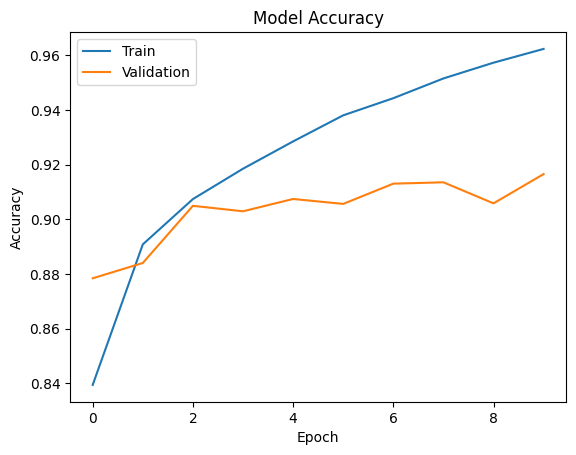

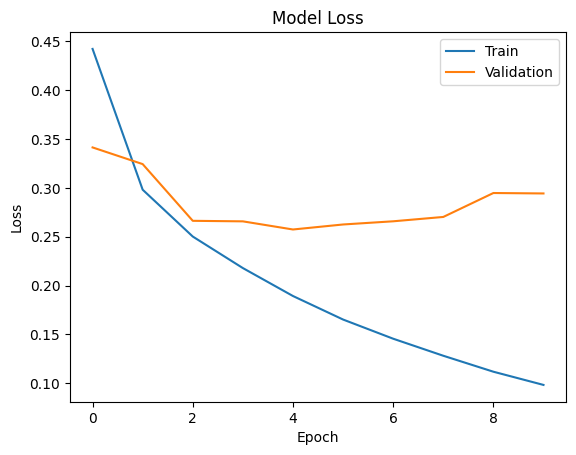

In [ ]:
#visualize the model accuracy and loss

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])  # Add validation accuracy
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])  # Add legend
plt.show()

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])  # Add validation loss
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])  # Add legend
plt.show()


In [ ]:
#evaluate the model with the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2943 - accuracy: 0.9165
Test accuracy: 0.9164999723434448


313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

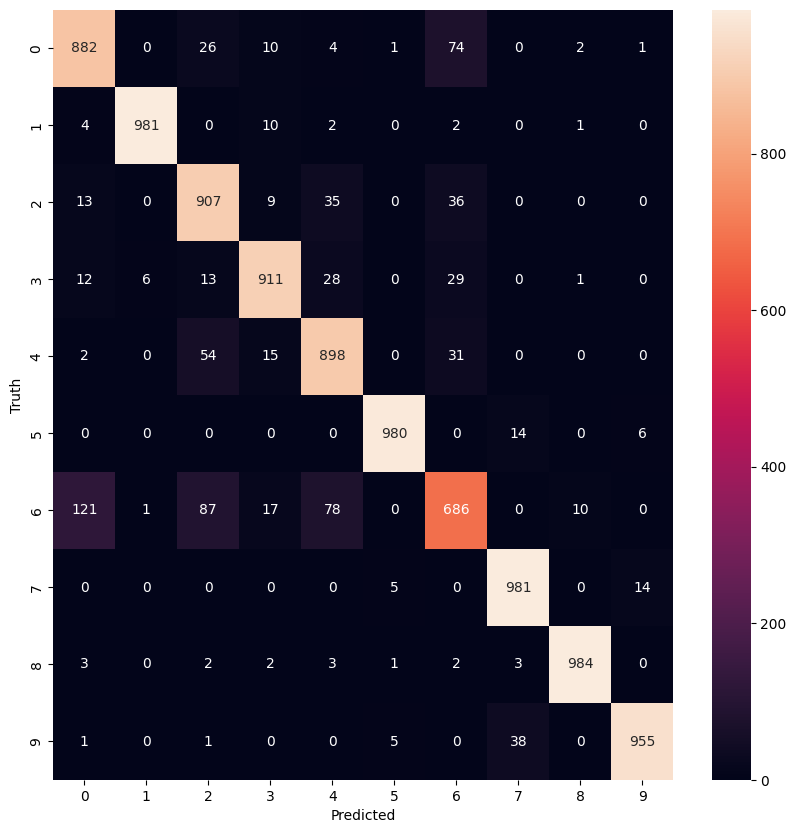

In [ ]:
#confusion matrix
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#classification report
print(classification_report(y_test, y_pred, target_names=class_names))


              precision    recall  f1-score   support

 T-shirt/top       0.85      0.88      0.87      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.83      0.91      0.87      1000
       Dress       0.94      0.91      0.92      1000
        Coat       0.86      0.90      0.88      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.80      0.69      0.74      1000
     Sneaker       0.95      0.98      0.96      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [ ]:
#save the model
model.save('fashion_mnist.keras')
